# Demonstrates accuracy of one- and two-sided finite-difference derivatives


**Randall Romero Aguilar, PhD**

This demo is based on the original Matlab demo accompanying the  <a href="https://mitpress.mit.edu/books/applied-computational-economics-and-finance">Computational Economics and Finance</a> 2001 textbook by Mario Miranda and Paul Fackler.

Original (Matlab) CompEcon file: **demdif02.m**

Running this file requires the Python version of CompEcon. This can be installed with pip by running

    !pip install compecon --upgrade

<i>Last updated: 2021-Oct-01</i>
<hr>

## About

Demonstrates accuracy of one- and two-sided finite-difference derivatives of $e^x$ at $x=1$ as a function of step size $h$.

## Initial tasks

In [1]:
import numpy as np
from compecon import demo
import matplotlib.pyplot as plt

## Setting parameters

In [2]:
n, x = 18, 1.0
c = np.linspace(-15,0,n)
h = 10 ** c

In [3]:
exp = np.exp
eps = np.finfo(float).eps

def deriv_error(l, u):
    dd = (exp(u) - exp(l)) / (u-l)
    return np.log10(np.abs(dd - exp(x)))

## One-sided finite difference derivative

In [4]:
d1 = deriv_error(x, x+h)
e1 = np.log10(eps**(1/2))

## Two-sided finite difference derivative

In [5]:
d2 = deriv_error(x-h, x+h)
e2 = np.log10(eps**(1/3))

## Plot finite difference derivatives

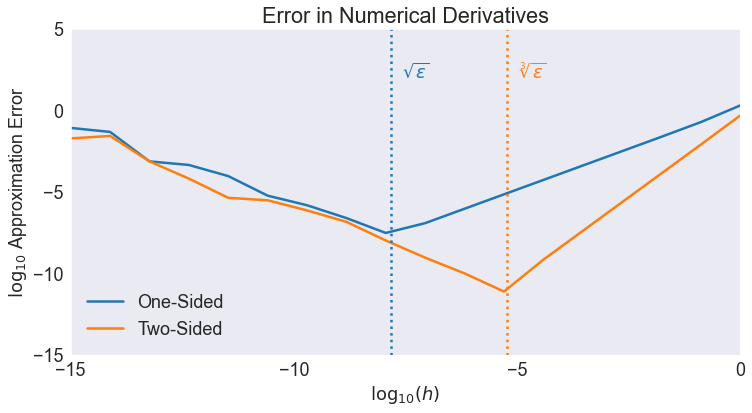

In [6]:
fig, ax = plt.subplots()
ax.plot(c,d1, label='One-Sided')
ax.plot(c,d2, label='Two-Sided')
ax.axvline(e1, color='C0', linestyle=':')
ax.axvline(e2, color='C1',linestyle=':')

ax.set(title='Error in Numerical Derivatives',
       xlabel='$\log_{10}(h)$',
       ylabel='$\log_{10}$ Approximation Error',
       xlim=[-15, 0], xticks=np.arange(-15,5,5),
       ylim=[-15, 5], yticks=np.arange(-15,10,5)
       )

ax.annotate('$\sqrt{\epsilon}$', (e1+.25, 2), color='C0')
ax.annotate('$\sqrt[3]{\epsilon}$', (e2 +.25, 2),color='C1')
ax.legend(loc='lower left');

In [7]:
#demo.savefig([plt.gcf()], name='demdif02')